In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 9.0)

#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
#Checking for empty or null records
null_data = train_df.isnull().sum()
print('Total null data in the training dataset is {}'.format(sum(null_data)))

Total null data in the training dataset is 0


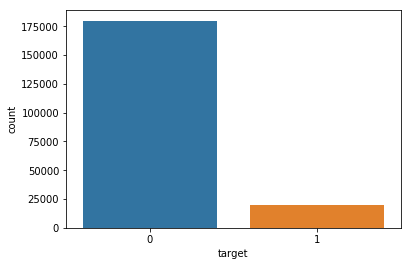

In [5]:
sns.countplot(train_df['target'])

In [6]:
bought = train_df[train_df['target'] == 1].shape[0]

print('Training dataset has {} records out of which {}% have done transaction'.format(train_df.shape[0], 100*(bought/train_df.shape[0])))

Training dataset has 200000 records out of which 10.049% have done transaction


The data is highly imbalanced. We need to balance it before training.

### **Creating balanced training dataset**


In [7]:
#We will use 150000 records for training and the rest for testing out model

#For training
df_train_bal = train_df[:150000]

#For testing
df_test_bal = train_df[150000:]

In [8]:
#Creating a balanced dataset with comparable counts of both the outcome classes 0 and 1
df_train_bal_0 = df_train_bal[df_train_bal['target'] == 0]
df_train_bal_1 = df_train_bal[df_train_bal['target'] == 1]

#Selected 50000 non-transactions
df_train_bal_0 = df_train_bal_0.sample(50000)

#Final trainign dataset with balanced records, Randomize the dataset
df_train_bal = df_train_bal_0.append(df_train_bal_1).sample(frac=1)

In [9]:
df_train_bal['target'].value_counts()

0    50000
1    15034
Name: target, dtype: int64

Above dataset looks much more balanced now.

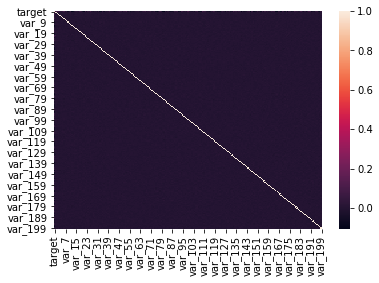

In [10]:
corr = df_train_bal.corr()
sns.heatmap(corr)

The above heatmap does not give much information on the feature correlation. Let's check tha actual correlation values.

In [11]:
corr['target'].sort_values(ascending=False)

target     1.000000
var_6      0.091227
var_26     0.090028
var_110    0.089684
var_53     0.086670
var_99     0.082638
var_22     0.080376
var_190    0.078566
var_0      0.075381
var_2      0.075049
var_133    0.071402
var_1      0.069479
var_179    0.068412
var_40     0.067896
var_170    0.066750
var_94     0.066164
var_78     0.065601
var_67     0.064439
var_18     0.064167
var_184    0.063725
var_191    0.061322
var_118    0.059236
var_173    0.057413
var_155    0.054612
var_147    0.054440
var_95     0.054421
var_35     0.054321
var_164    0.054017
var_91     0.052938
var_71     0.048898
             ...   
var_9     -0.054178
var_121   -0.055289
var_127   -0.055545
var_75    -0.056089
var_86    -0.056978
var_122   -0.057159
var_192   -0.058269
var_154   -0.061985
var_33    -0.062967
var_108   -0.063086
var_115   -0.064246
var_149   -0.066449
var_92    -0.066560
var_44    -0.066582
var_109   -0.067866
var_169   -0.070628
var_34    -0.071735
var_198   -0.072278
var_13    -0.072461


In [12]:
#For training
X = df_train_bal.drop(['target','ID_code'], axis=1)
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
17999,12.3570,-4.0289,5.4240,7.5854,9.8761,-16.3446,5.3111,17.1680,2.8870,6.1882,...,1.8562,8.4245,1.4713,5.3861,15.6108,-1.7110,-3.2732,9.0698,15.0013,0.9890
88062,16.7278,0.1081,6.5312,4.8453,10.9224,-3.4367,5.5684,20.2132,4.1902,9.2458,...,2.5049,9.0194,0.8750,-1.5378,16.9271,1.5563,-4.4878,7.0062,14.1536,13.1117
91850,16.9216,-2.9479,10.4223,5.9331,11.9164,-2.9001,5.8427,10.0581,-5.2656,9.5919,...,10.8130,6.9700,2.1342,4.0523,20.6858,-0.5930,-6.0440,7.7905,16.8843,-15.7476
44931,6.4784,-3.5704,11.9827,5.2384,8.6638,-4.1165,4.6836,14.8559,-2.1574,7.6734,...,2.5081,7.0013,2.0499,0.5600,13.3421,-1.9477,-1.9122,7.3450,15.0125,-21.5111
146871,7.3629,-1.9694,7.9636,10.1769,11.4701,2.2616,7.6836,13.8817,-1.3889,9.5510,...,3.0075,5.8720,1.2264,3.1828,11.5020,-1.0270,9.5170,9.0302,18.5330,-12.0742


In [13]:
y = df_train_bal.iloc[:,1:2]

print('Unique target values are :')
print(y['target'].value_counts())

Unique target values are :
0    50000
1    15034
Name: target, dtype: int64


In [14]:
#For testing
X_test = df_test_bal.drop(['target','ID_code'], axis=1)

y_test = df_test_bal.iloc[:,1:2]

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
lr_model.score(X_test, y_test)

0.8968

So we get approximately 91% accuracy without any tuning or enhancement. Now let's use PCA for Feature Reduction.

In [17]:
#Processing actual Testing data before submission
test_df_clean = test_df.drop('ID_code', axis=1)
test_df_clean.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## LightGBM

In [64]:
#We will apply LightGBM directly on the hole training datset
from sklearn.model_selection import train_test_split

X = train_df.drop('ID_code', axis=1)
y = train_df.iloc[:,1:2]
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_actual_test = test_df.drop('ID_code', axis=1)

In [74]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params, d_train, 200)

In [75]:
#Prediction
y_pred=clf.predict(X_test)

#convert into binary values
for i in range(0,X_test.shape[0]):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [76]:
(y_pred == 1).sum()

0

In [77]:
accuracy_score(y_test, y_pred)

0.89998

In [78]:
#Actual Prediction
y_pred_act=clf.predict(X_actual_test)

#convert into binary values
for i in range(0,X_actual_test.shape[0]):
    if y_pred_act[i]>=.5:       # setting threshold to .5
       y_pred_act[i]=1
    else:  
       y_pred_act[i]=0

In [79]:
y_pred_act

array([0., 0., 0., ..., 0., 0., 0.])

##  Applying PCA

In [18]:
#Applying PCA on both training and test dataset
from sklearn.decomposition import PCA

pca = PCA()
#Training data
X_train_pca = pca.fit_transform(X)

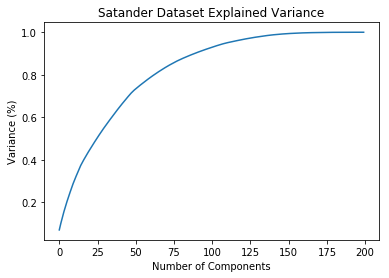

In [19]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Satander Dataset Explained Variance')
plt.show()

Above plot clearly shows that 100 features explains  approximately 90% of the variance.

In [20]:
#Now applyting PCA for 100 componenets
pca_best = PCA(n_components=100)
X_train_pca = pca_best.fit_transform(X)
X_test_pca = pca_best.transform(X_test)
X_actual_test = pca_best.transform(test_df_clean)

#Coveting numpy array back to Dataframe
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca= pd.DataFrame(X_test_pca)
X_actual_test = pd.DataFrame(X_actual_test)

In [21]:
#Applying best param to LR model
lr_model_best = LogisticRegression(C=10)
lr_model_best.fit(X_train_pca, y)

accuracy_lr_best = lr_model_best.score(X_test_pca, y_test)
print('Accuracy of best LR model is {}'.format(accuracy_lr_best))

Accuracy of best LR model is 0.88626


**Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, n_estimators=50, learning_rate=0.1)
gb_model.fit(X_train_pca, y)

accuracy_gb = gb_model.score(X_test_pca, y_test)
print('Accuracy of a basic GB model is {}'.format(accuracy_gb))

Accuracy of a basic GB model is 0.89884


In [23]:
#Finding optimal learning rate

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_depth = 2, random_state = 0)
    gb.fit(X_train_pca, y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_pca, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_pca, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.769
Accuracy score (validation): 0.899

Learning rate:  0.1
Accuracy score (training): 0.769
Accuracy score (validation): 0.899

Learning rate:  0.25
Accuracy score (training): 0.771
Accuracy score (validation): 0.899

Learning rate:  0.5
Accuracy score (training): 0.779
Accuracy score (validation): 0.896

Learning rate:  0.75
Accuracy score (training): 0.786
Accuracy score (validation): 0.889

Learning rate:  1
Accuracy score (training): 0.786
Accuracy score (validation): 0.875



In [24]:
gb_model_best = GradientBoostingClassifier(max_depth=2, n_estimators=20, learning_rate=0.05)
gb_model_best.fit(X_train_pca, y)

accuracy_gb = gb_model_best.score(X_test_pca, y_test)
print('Accuracy of a best GB model is {}'.format(accuracy_gb))

Accuracy of a best GB model is 0.89872


In [33]:
# #Trying other classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
rf = RandomForestClassifier()
gnb = GaussianNB()
svm = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', lr), 
                ('rf', rf), 
#                 ('gnb', gnb),
#                ('svm', svm)
               ], 
    voting='hard')

In [34]:
voting_clf.fit(X_train_pca, y)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [38]:
from sklearn.metrics import accuracy_score

for clf in (lr, rf, voting_clf):
    clf.fit(X_train_pca, y)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.88626
RandomForestClassifier 0.88614
VotingClassifier 0.8985


## On Test Dataset

In [27]:
test_pred = lr_model_best.predict(X_actual_test)

In [80]:
# submission = pd.DataFrame({
#         "ID_code": test_df["ID_code"],
#         "target": test_pred
#     })

#LGBM
submission = pd.DataFrame({
        "ID_code": test_df["ID_code"],
        "target": y_pred_act
    })

In [81]:
submission.to_csv('submission.csv', index=False)

In [82]:
submission.head(10)

,ID_code,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,0.0
4,test_4,0.0
5,test_5,0.0
6,test_6,0.0
7,test_7,0.0
8,test_8,0.0
9,test_9,0.0


In [83]:
submission['target'].value_counts()

0.0    200000
Name: target, dtype: int64